In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
data=pd.read_excel('/content/Data_Train.xlsx')

In [267]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [269]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [270]:
# DROP the missing values
data.dropna(inplace=True)

In [271]:
# convert Date of journey into datetime format
data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [273]:
# extract
data['Date']= data['Date_of_Journey'].dt.day
data['Month']= data['Date_of_Journey'].dt.month
data['Year']= data['Date_of_Journey'].dt.year

In [274]:
# drop the date of journey column

data.drop('Date_of_Journey', axis=1, inplace=True)

In [275]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [276]:
# convert Date of journey into datetime format
data['Dep_hour']=data['Dep_Time'].str.split(':').str[0].astype(int)
data['Dep_min']=data['Dep_Time'].str.split(':').str[1].astype(int)

In [277]:
# drop the Dep_hour column

data.drop('Dep_Time', axis=1, inplace=True)

In [278]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [279]:
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])

/tmp/ipython-input-151/3394994777.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])


In [280]:
# extract the arrival hour and arrival min from the arrival time column
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_minute']=pd.to_datetime(data['Arrival_Time']).dt.minute
data['Arrival_month']=pd.to_datetime(data['Arrival_Time']).dt.month

In [281]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [282]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,2
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,2


In [283]:
# convert Date of journey into datetime format
data['Dur_hour']=data['Duration'].str.split(':').str[0]
data['Dur_min']=data['Duration'].str.split(':').str[1]

In [284]:
data.drop('Duration',axis=1,inplace=True)

In [285]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Arrival_month,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,3,2h 50m,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,2,7h 25m,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,6,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,2,5h 25m,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,2,4h 45m,NaN


In [286]:
# cleaning the total stops column
data['Total_Stops'].unique()
data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [287]:
# non stop values converted into 0 stops
data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0 stop')

In [288]:
# cleaning the total stops column
data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
0 stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [289]:
data['Total_Stops'] = data['Total_Stops'].replace('0 stops','0 ')
data['Total_Stops'] = data['Total_Stops'].replace('1 stops','1 ')
data['Total_Stops'] = data['Total_Stops'].replace('2 stops','2 ')
data['Total_Stops'] = data['Total_Stops'].replace('3 stops','3 ')
data['Total_Stops'] = data['Total_Stops'].replace('4 stops','4 ')

In [290]:
data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
0 stop,3491
2,1520
3,45
4,1


In [291]:
 data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [292]:
# exreact the route column into multiple columns
data['Route_1']=data['Route'].str.split('→').str[0].str.strip()
data['Route_2']=data['Route'].str.split('→').str[1].str.strip()
data['Route_3']=data['Route'].str.split('→').str[2].str.strip()
data['Route_4']=data['Route'].str.split('→').str[3].str.strip()
data['Route_5']=data['Route'].str.split('→').str[4].str.strip()


In [293]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,...,Arrival_hour,Arrival_minute,Arrival_month,Dur_hour,Dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 stop,No info,3897,24,3,2019,...,1,10,3,2h 50m,NaN,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,...,13,15,2,7h 25m,NaN,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,...,4,25,6,19h,NaN,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,...,23,30,2,5h 25m,NaN,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,...,21,35,2,4h 45m,NaN,BLR,NAG,DEL,NaN,NaN


In [294]:

# removing nan values
data['Route_1'] = data['Route_1'].fillna('None')
data['Route_2'] = data['Route_2'].fillna('None')
data['Route_3'] = data['Route_3'].fillna('None')
data['Route_4'] = data['Route_4'].fillna('None')
data['Route_5'] = data['Route_5'].fillna('None')

In [295]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,...,Arrival_hour,Arrival_minute,Arrival_month,Dur_hour,Dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 stop,No info,3897,24,3,2019,...,1,10,3,2h 50m,NaN,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,...,13,15,2,7h 25m,NaN,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,...,4,25,6,19h,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,...,23,30,2,5h 25m,NaN,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,...,21,35,2,4h 45m,NaN,BLR,NAG,DEL,None,None


In [296]:
# remove route colume
data.drop('Route',axis=1,inplace=True)

In [297]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,...,Arrival_hour,Arrival_minute,Arrival_month,Dur_hour,Dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0 stop,No info,3897,24,3,2019,22,...,1,10,3,2h 50m,NaN,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,...,13,15,2,7h 25m,NaN,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,...,4,25,6,19h,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,...,23,30,2,5h 25m,NaN,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,...,21,35,2,4h 45m,NaN,BLR,NAG,DEL,None,None


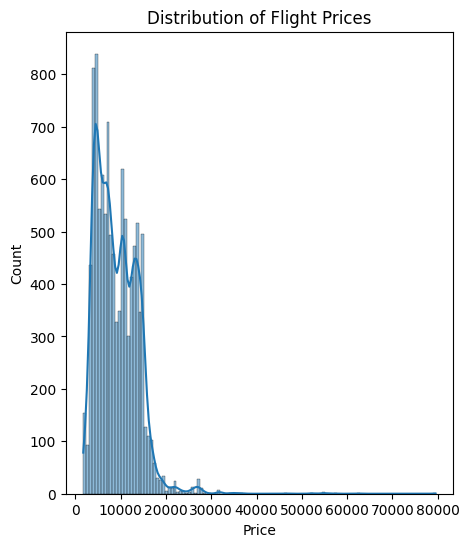

In [298]:
# plot the distribution of the target variable
plt.figure(figsize=(5,6))
sns.histplot(data['Price'],kde=True)
plt.title('Distribution of Flight Prices')
plt.show()

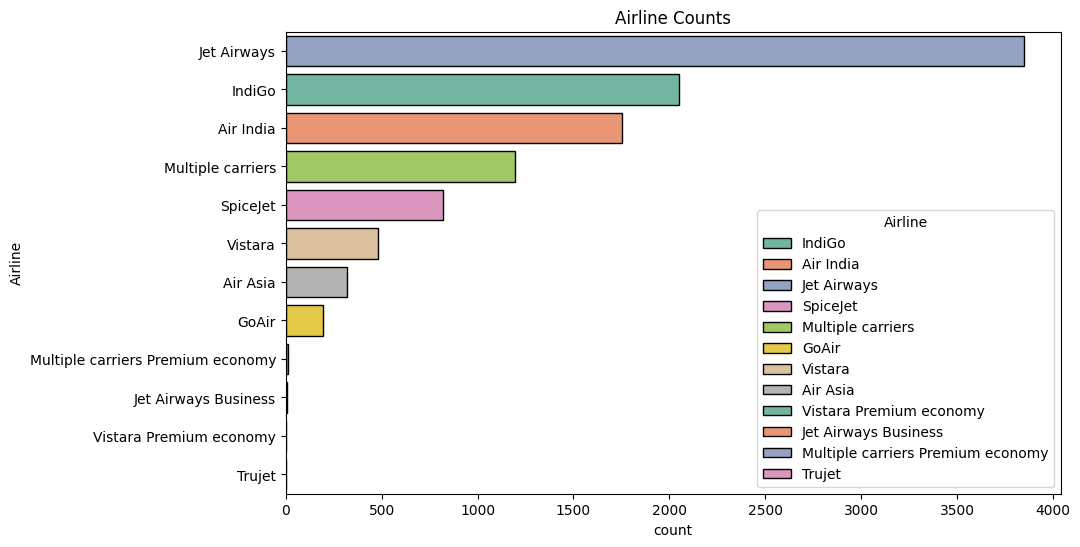

In [299]:
# plot the airline counts
plt.figure(figsize=(10, 6))
# make horizontal bar plot of airline counts
sns.countplot(y=data['Airline'], order=data['Airline'].value_counts().index,hue=data['Airline'],edgecolor='black',palette='Set2',dodge=False,legend=True)
plt.title('Airline Counts')
plt.show()

In [302]:
# all category columns converts into labed encodind
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [303]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,...,Arrival_hour,Arrival_minute,Arrival_month,Dur_hour,Dur_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897,24,3,2019,22,...,1,10,3,240,NaN,0,10,21,10,4
1,1,3,0,2,8,7662,1,5,2019,5,...,13,15,2,336,NaN,2,20,1,3,4
2,4,2,1,2,8,13882,9,6,2019,9,...,4,25,6,106,NaN,3,27,4,5,4
3,3,3,0,1,8,6218,12,5,2019,18,...,23,30,2,311,NaN,2,29,3,10,4
4,3,0,5,1,8,13302,1,3,2019,16,...,21,35,2,303,NaN,0,29,7,10,4


In [306]:
# check central tendency of the price column mean, median mode
print('Mean Price:', data['Price'].mean())
print('Median Price:', data['Price'].median())
print('Mode Price:', data['Price'].mode()[0])

Mean Price: 9087.21456656057
Median Price: 8372.0
Mode Price: 10262


In [ ]:
# split the data into x and y


In [308]:
# Split data into features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10682, 20)
Shape of y: (10682,)


In [311]:
# DATA preprocessing and model training
from sklearn.model_selection import train_test_split

# Ensure all numeric columns are of numeric dtype and handle NaNs.
# Dur_hour already appears to be int64 based on kernel state.
# Dur_min still has NaNs, likely because it was created incorrectly and all values are NaN.
# If X['Dur_min'] contains only NaNs, X['Dur_min'].mean() will also be NaN.
# Let's fill Dur_min NaNs with 0 to ensure it's numeric and has no NaNs.
X['Dur_min'] = X['Dur_min'].fillna(0)

# Also convert Dur_hour to numeric, in case it's an object type that was skipped earlier but contains numeric strings
X['Dur_hour'] = pd.to_numeric(X['Dur_hour'], errors='coerce').fillna(0)

# Verify no NaNs remain in X before splitting
print("NaNs in X before split:")
print(X.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

NaNs in X before split:
Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Date               0
Month              0
Year               0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_minute     0
Arrival_month      0
Dur_hour           0
Dur_min            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64
Mean Absolute Error: 2296.423624867416
Mean Squared Error: 10790340.733371498
R-squared: 0.49956810374898386


In [312]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
Dtr=DecisionTreeRegressor()
Dtr.fit(X_train,y_train)
y_pred_dtr = Dtr.predict(X_test)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
print('Decision Tree Regressor - Mean Absolute Error:', mae_dtr)
print('Decision Tree Regressor - Mean Squared Error:', mse_dtr)
print('Decision Tree Regressor - R-squared:', r2_dtr)

Decision Tree Regressor - Mean Absolute Error: 666.6155046014662
Decision Tree Regressor - Mean Squared Error: 3297826.2682628813
Decision Tree Regressor - R-squared: 0.8470541854318673


In [313]:
#SVR
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print('SVR - Mean Absolute Error:', mae_svr)
print('SVR - Mean Squared Error:', mse_svr)
print('SVR - R-squared:', r2_svr)

SVR - Mean Absolute Error: 2276.824585540574
SVR - Mean Squared Error: 12013998.702904394
SVR - R-squared: 0.4428175809260886


In [314]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print('KNN - Mean Absolute Error:', mae_knn)
print('KNN - Mean Squared Error:', mse_knn)
print('KNN - R-squared:', r2_knn)

KNN - Mean Absolute Error: 1729.7783809078146
KNN - Mean Squared Error: 8898123.423940102
KNN - R-squared: 0.5873249151116846


In [315]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest Regressor - Mean Absolute Error:', mae_rf)
print('Random Forest Regressor - Mean Squared Error:', mse_rf)
print('Random Forest Regressor - R-squared:', r2_rf)

Random Forest Regressor - Mean Absolute Error: 618.483784912093
Random Forest Regressor - Mean Squared Error: 1986517.4042644685
Random Forest Regressor - R-squared: 0.9078697609170774


In [318]:
# make a dataframe to compare the performance of all the models
model_comparison = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Regressor', 'SVR', 'KNN Regressor', 'Random Forest Regressor'],
                                 'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_dtr), mean_absolute_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_knn), mean_absolute_error(y_test, y_pred_rf)],
                                 'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_dtr), mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_rf)],
                                 'R2 Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dtr), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_knn), r2_score(y_test, y_pred_rf)]})

In [319]:
model_comparison

,Model,MAE,MSE,R2 Score
0,Linear Regression,2296.423625,1.079034e+07,0.499568
1,Decision Tree Regressor,666.615505,3.297826e+06,0.847054
2,SVR,2276.824586,1.201400e+07,0.442818
3,KNN Regressor,1729.778381,8.898123e+06,0.587325
4,Random Forest Regressor,618.483785,1.986517e+06,0.907870


In [ ]:
# SAVE model
import joblib

# New Section